In [2]:
# When using the 'inline' backend, your matplotlib graphs will be included in your notebook, next to the code.
%matplotlib inline  

Matplotlib is building the font cache; this may take a moment.


<img src="figures/ML.png" width="50%">

What is machine learning: Machine learning is the subfield of computer science that,
according to Arthur Samuel, gives "computers the ability to learn
without being explicitly programmed.”

In supervised learning, we are given a data set and already know what our correct output should look like, having the idea that there is a relationship between the input and the output. Supervised learning problems are categorized into "regression" and "classification" problems. 
* In a regression problem, we are trying to predict results within a continuous output, meaning that we are trying to map input variables to some continuous function. 
* In a classification problem, we are instead trying to predict results in a discrete output. In other words, we are trying to map input variables into discrete categories.


Unsupervised learning: depend only on the underlying **unlabeled** data to identify hidden patterns of data instead of inferring models for known input-output pairs.

Others: Reinforcement learning, recommender systems.

Learn more: [What’s the Difference Between Artificial Intelligence, Machine Learning and Deep Learning?](https://blogs.nvidia.com/blog/2018/08/02/supervised-unsupervised-learning/)

# Representation and Visualization of Data
### The most important step in Machine Learning

### A Simple Example: the Iris Dataset

<img src="figures/irises-grass.jpg" width="50%">
<img src="figures/blue-iris-field.jpg" width="50%">

<img src="figures/3-iris.png" width="100%">

### Question:

**How many species does iris have?**  
Ans: 3

## Data representation

4 features: sepal_length (cm),	sepal_width,	petal_length,	petal_width	species
      
      4.9, 3. , 1.4, 0.2
   
      4.9, 3.1, 1.5, 0.1
     
      6.7, 3. , 5. , 1.7
     
      6.4, 2.8, 5.6, 2.2
     

**How to solve it!**

## K-means


Unsupervised, where we’ve given a set of feature vectors, without labels, and then we attempt to group them into natural clusters.

Clustering: 
- Hierarchical clustering: n cube complexity, deteministic
- K-Means: know the number of K; much faster; non-deterministic.
1. K: if we choose them poorly, it could take longer to converge. 
2. More worrisome, you could get different answers. 
weakness of the algorithm: you are running this greedy algorithm,  results can depends upon the initial centroids.

Solutions:
* For 1 million data, choose 1000-2000 to run Hierarchical clustering to get an idea of K. Then use K-means.
* Unlucky initial centroids? put them into the corners; build sets of initial centroids and then select the best result. This is common for randomized greedy algorithms. You just choose multiple initial conditions. Try them all out and pick the best. 
* Objective function: Dissimilarity. Euclidean distance.

### Pure Python implemention of k-mean  - Psuedo code only (not for running)  

Learn more about K-means: [A simple explaination](https://www.analyticsvidhya.com/blog/2020/10/a-simple-explanation-of-k-means-clustering/)

In [1]:
def kmeans(samples, k, verbose=False):
    # Get k randomly chosen initial centroids, create cluster for each
    initialCentroids = random.sample(samples, k)
    clusters = []
    for e in initialCentroids:
        clusters.append(cluster.Cluster([e]))

    # Iterate until centroids do not change
    converged = False
    numIterations = 0
    while not converged:
        numIterations += 1
        # Create a list containing k distinct empty lists
        newClusters = []
        for i in range(k):
            newClusters.append([])

        # Associate each example with closest centroid
        for e in samples:
            # Find the centroid closest to e
            smallestDistance = e.distance(clusters[0].computeCentroid())
            index = 0
            for i in range(1, k):
                distance = e.distance(clusters[i].computeCentroid())
                if distance < smallestDistance:
                    smallestDistance = distance
                    index = i
            # Add e to the list of samples for appropriate cluster
            newClusters[index].append(e)

        for c in newClusters:  # Avoid having empty clusters
            if len(c) == 0:
                raise ValueError('Empty Cluster')

        # Update each cluster; check if a centroid has changed
        converged = True
        for i in range(k):
            if clusters[i].update(newClusters[i]) > 0.0:
                converged = False
        if verbose:
            print('Iteration #' + str(numIterations))
            for c in clusters:
                print(c)
            print('')  # add blank line
    return clusters

In [2]:
class Sample:
    def __init__(self, id, features, label = None):
        #Assumes features is an array of floats
        self.id = id
        self.features = features
        self.label = label
    
    def distance(self, other):
        return minkowskiDist(self.features, other.getFeatures(), 2)

In [3]:
def minkowskiDist(v1, v2, p):
    #Assumes v1 and v2 are equal length arrays of numbers
    dist = 0
    for i in range(len(v1)):
        dist += abs(v1[i] - v2[i])**p
    return dist**(1/p)

In [ ]:
class Cluster:
    def __init__(self,samples):
        """Assumes examples a non-empty list of Examples"""
        self.examples = examples
        self.centroid = self.computeCentroid()
    
    def update(self,samples):
        """Assume examples is a non-empty list of Examples
           Replace examples; return amount centroid has changed"""
        oldCentroid = self.centroid
        self.examples = examples
        self.centroid = self.computeCentroid()
        return oldCentroid.distance(self.centroid)
    
    def computeCentroid(self):
        vals = 
        for e in self.samples:
            vals += e.getFeatures()
        centroid = Example('centroid',vals/len(self.examples))
        return centroid
    
    def variability(self):
        totDist = 0
        for e in self.samples:
            totDist += (e.distance(self.centroid))**2
        return totDist
    
    def members(self):
        for e in self.samples:
            yield e
...         

In [6]:
def dissimilarity(clusters):
    """Assumes clusters a list of clusters
       Returns a measure of the total dissimilarity of the
       clusters in the list"""
    totDist = 0
    for c in clusters:
        totDist += c.variability()
    return totDist

In [7]:
def testClustering(flowers, numClusters, seed = 0, numTrials = 5):
    random.seed(seed)
    bestClustering = trykmeans(flowers, numClusters, numTrials)
    posFracs = printClustering(bestClustering)
    return posFracs

def trykmeans(examples, numClusters, numTrials, verbose = False):
    """Calls kmeans numTrials times and returns the result with the
          lowest dissimilarity"""
    best = kmeans(examples, numClusters, verbose)
    minDissimilarity = cluster.dissimilarity(best)
    trial = 1
    while trial < numTrials:
        try:
            clusters = kmeans(examples, numClusters, verbose)
        except ValueError:
            continue #If failed, try again
        currDissimilarity = cluster.dissimilarity(clusters)
        if currDissimilarity < minDissimilarity:
            best = clusters
            minDissimilarity = currDissimilarity
        trial += 1
    return best

The above example is to show you how complicated the programming is. How much memory it takes. And the speed.

## Rewrite it with Scikit-Learn

** numpy ** 

NumPy provides support for large multidimensional arrays and matrices along with a collection of mathematical functions to operate on these elements. 

* NumPy is written in C, and executes very quickly as a result. By comparison, Python is a dynamic language that is interpreted by the CPython interpreter, converted to bytecode, and executed. 

* The arrays ndarray are held in memory as contiguous blocks that are all the same size and type. This allows not only fast access but lets different-size arrays be used together. Python relies extensively on lists, general-purpose containers that are easy to use but can contain objects of different types. Overall a task executed in Numpy is around 5 to 100 times faster than standard python lis

**Tensorflow** the dot product is approximately 8 and 7 times faster compared to NumPy for the largest matrices. 
Matrix addition is slow with the GPU libraries. NumPy is the fastest in these tests.

**TensorFlow** is a deep learning library, which is designed to perform at best on GPUs. The GPU are installed on the PCIe bus, and the communication to this bus is a lot slower than the communications between CPU and the system memory. And so, we have advantages on using GPU only when there are so many calculations to do on the data that the system-GPU transfer time becomes negligible with respect to the actual calculation time. 

* numpy parallelize operations like

> C = numpy.dot(A,B)

numpy uses an optimized implementation from "BLAS" (the Basic Linear Algebra Subroutines)- a library carefully tuned to run as fast as possible on your hardware by taking advantage of cache memory and assembler implementation. BLAS also takes advantage of a multicore machine. If your numpy is compiled using BLAS enabled with multicore. then dot() will be computed in parallel (if this is faster) . Similarly for other matrix operations, like inversion, singular value decomposition, determinant, and so on. 

The open source library ATLAS, LAPACK allows compile time selection of the level of parallelism. The proprietary MKL library from Intel offers the possibility to chose the level of parallelism at runtime. There is also the GOTO library that allow run-time selection of the level of parallelism. This is a commercial product but the source code is distributed free for academic use.  

* numpy does not parallelize operations like

> A = B + C 
 
> A = numpy.sin(B)
 
> A = scipy.stats.norm.isf(B)

These operations run sequentially, taking no advantage of multicore machines. 
* In principle, this could be changed without too much work. OpenMP is an extension to the C language which allows compilers to produce parallelizing code for appropriately-annotated loops (and other things). If someone sat down and annotated a few core loops in numpy (and possibly in scipy), and if one then compiled numpy/scipy with OpenMP turned on, all three of the above would automatically be run in parallel. Of course, in reality one would want to have some runtime control - for example, one might want to turn off automatic parallelization if one were planning to run several jobs on the same multiprocessor machine.

Scikit-learn
* Will we add GPU support?
No, or at least not in the near future. The main reason is that GPU support will introduce many software dependencies and introduce platform specific issues. scikit-learn is designed to be easy to install on a wide variety of platforms. Outside of neural networks, GPUs don’t play a large role in machine learning today, and much larger gains in speed can often be achieved by a careful choice of algorithms.

Popular deep learning tools rank on GitHub:
[Top Deep Learning tools on GitHub](https://github.com/aymericdamien/TopDeepLearning)

** Add example about ndarray vs list **

## Program K-means from scratch using Scilit-learn

In [3]:
%matplotlib inline
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [4]:
# Load the data.
iris = datasets.load_iris()
#Define your target and predictors.
X = iris.data[:, :2]
y = iris.target

In [5]:
# Now, let’s instantiate and fit our K means cluster model. We are going to use three clusters and a random state of 21.
km = KMeans(n_clusters = 3, n_jobs = 4, random_state=21, init = 'k-means++', max_iter = 300, n_init = 10)
#
km.fit(X)
# With the following code you can identify the center points of the data.
centers = km.cluster_centers_
print(centers)

# Now, let’s compare our original data versus our clustered results using the following code.
# This will tell us to which cluster does the data observations belong.
new_labels = km.labels_

[[5.77358491 2.69245283]
 [5.006      3.428     ]
 [6.81276596 3.07446809]]


C:\Users\HP\anaconda3\envs\qcfml-bootcamp\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


Kmeans documentation: [Kmeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

Text(0, 0.5, 'Sepal Width')

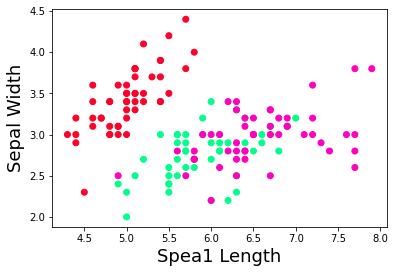

In [6]:
#Let’s have a look at our data through a scatter plot.
plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Spea1 Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

Text(0.5, 1.0, 'Predicted')

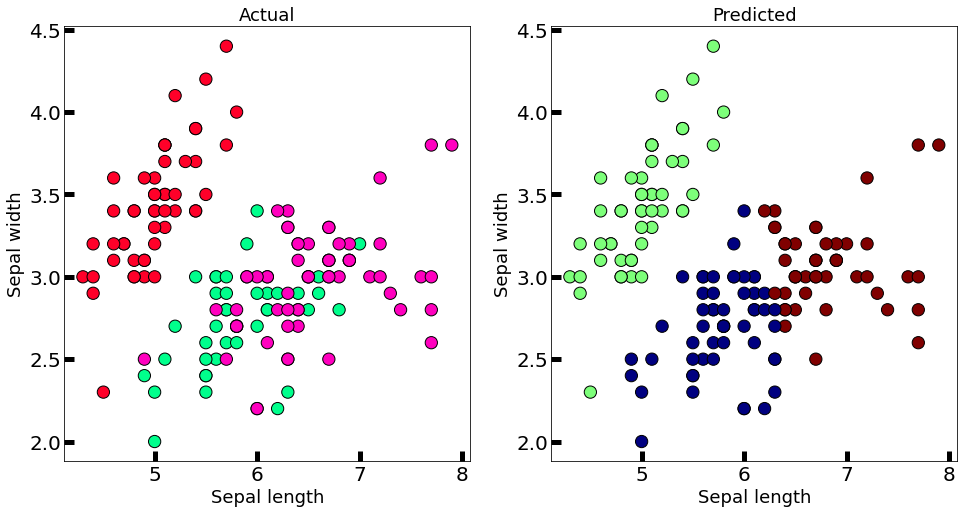

In [7]:
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

## Choose number of clusters

C:\Users\HP\anaconda3\envs\qcfml-bootcamp\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


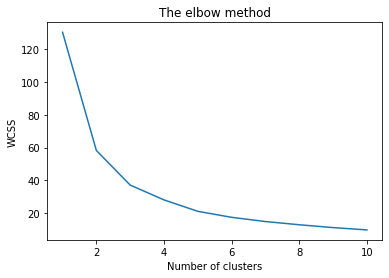

In [9]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a li dne graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration. Now that we have the optimum amount of clusters, we can move on to applying K-means clustering to the Iris dataset.

## Implement for choosen K

In [10]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)


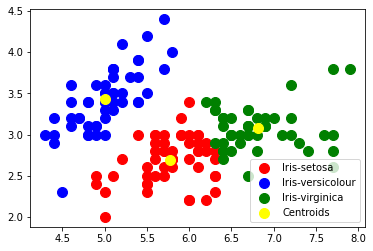

In [11]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()